## Project "Concrete Strength Prediction"

## Objective
To predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain 85% to 95% accuracy.


#### Resources Available
The data for this project is available in file https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/.

### Steps and Tasks:

##### Exploratory Data Quality Report Reflecting the Following:

1. Univariate analysis<br>
  Data types and description of the independent attributes which should include
  - name, 
  - range of values observed, 
  - central values (mean and median), 
  - standard deviation and quartiles, 
  - analysis of the body of distributions/tails, 
  - missing values, 
  - outliers, 
  - duplicates
  <br><br>
2. Bi-variate analysis between the predictor variables and target column. 
 - Comment on your findings in terms of their relationship and degree of relation if any. 
 - Visualize the analysis using boxplots and pair plots, histograms, or density curves. 
<br><br>
3. Feature Engineering techniques<br>
 (1) Identify opportunities (if any) to extract new features from existing features, drop a feature(if required)<br> Hint: Feature Extraction, for example, consider a dataset with two features length and breadth. <br>
From this, we can extract a new feature Area which would be length * breadth.<br>
 (2) Get the data model ready and do a train test split.<br>
 (3) Decide on the complexity of the model, should it be a simple linear model in terms of parameters or would a quadratic or higher degree.<br>


##### Creating the Model and Tuning it:

1. Algorithms that you think will be suitable for this project. 
 - Use Kfold Cross-Validation to evaluate model performance. 
 - Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (at least 3 algorithms, one bagging and one boosting based algorithms have to be there). 
<br><br>
2. Techniques employed to squeeze that extra performance out of the model without making it overfit. 
 - Use Grid Search or Random Search on any of the two models used above. 
 - Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. 

### Attribute Information:

	Name	Data Type	Measurement	Description
1.	Cement (cement),	quantitative,	kg in a m3 mixture,	Input Variable
2.	Blast Furnace Slag (slag),	quantitative,	kg in a m3 mixture,	Input Variable
3.	Fly Ash (ash),	quantitative,	kg in a m3 mixture,	Input Variable
4.	Water(water),	quantitative,	kg in a m3 mixture,	Input Variable
5.	Superplasticizer (superplastic),	quantitative,	kg in a m3 mixture,	Input Variable
6.	Coarse Aggregate (coarseagg),	quantitative,	kg in a m3 mixture,	Input Variable
7.	Fine Aggregate (fineagg),	quantitative,	kg in a m3 mixture,	Input Variable
8.	Age(age),	quantitative,	Day (1~365),	Input Variable
9.	Concrete compressive strength(strength),	quantitative,	MPa,	Output Variable

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#### Time

In [1]:
from datetime import datetime
startTime = datetime.now()
print(startTime)

2020-12-05 03:42:18.298345


### Import all necessary modules and load the data

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.options.display.float_format = '{:,.4f}'.format

In [5]:
df = pd.read_csv('concrete.csv')

In [6]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3000,212.0000,0.0000,203.5000,0.0000,971.8000,748.5000,28,29.8900
1,168.9000,42.2000,124.3000,158.3000,10.8000,"1,080.8000",796.2000,14,23.5100
2,250.0000,0.0000,95.7000,187.4000,5.5000,956.9000,861.2000,28,29.2200
3,266.0000,114.0000,0.0000,228.0000,0.0000,932.0000,670.0000,28,45.8500
4,154.8000,183.4000,0.0000,193.3000,9.1000,"1,047.4000",696.7000,28,18.2900


In [7]:
df.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,135.0000,0.0000,166.0000,180.0000,10.0000,961.0000,805.0000,28,13.2900
1026,531.3000,0.0000,0.0000,141.8000,28.2000,852.1000,893.7000,3,41.3000
1027,276.4000,116.0000,90.3000,179.6000,8.9000,870.1000,768.3000,28,44.2800
1028,342.0000,38.0000,0.0000,228.0000,0.0000,932.0000,670.0000,270,55.0600
1029,540.0000,0.0000,0.0000,173.0000,0.0000,"1,125.0000",613.0000,7,52.6100


### Shape, Check for null values, Data types, Descriptive statistics

In [8]:
df.shape

(1030, 9)

In [9]:
df.isnull().any()

cement          False
slag            False
ash             False
water           False
superplastic    False
coarseagg       False
fineagg         False
age             False
strength        False
dtype: bool

##### <i>[Note] There is no null data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,"1,030.0000",281.1679,104.5064,102.0000,192.3750,272.9000,350.0000,540.0000
slag,"1,030.0000",73.8958,86.2793,0.0000,0.0000,22.0000,142.9500,359.4000
ash,"1,030.0000",54.1883,63.9970,0.0000,0.0000,0.0000,118.3000,200.1000
water,"1,030.0000",181.5673,21.3542,121.8000,164.9000,185.0000,192.0000,247.0000
superplastic,"1,030.0000",6.2047,5.9738,0.0000,0.0000,6.4000,10.2000,32.2000
coarseagg,"1,030.0000",972.9189,77.7540,801.0000,932.0000,968.0000,"1,029.4000","1,145.0000"
fineagg,"1,030.0000",773.5805,80.1760,594.0000,730.9500,779.5000,824.0000,992.6000
age,"1,030.0000",45.6621,63.1699,1.0000,7.0000,28.0000,56.0000,365.0000
strength,"1,030.0000",35.8180,16.7057,2.3300,23.7100,34.4450,46.1350,82.6000


##### <i>[Insights]
<i>All variables are numerical.
<br><i>All variables except age are continuous.
<br><i>There are no null values.
<br><i>There are no negative values.

### Skewness and Kurtosis

In [12]:
df.skew().sort_values(ascending=False)

age             3.2692
superplastic    0.9072
slag            0.8007
ash             0.5374
cement          0.5095
strength        0.4170
water           0.0746
coarseagg      -0.0402
fineagg        -0.2530
dtype: float64

In [13]:
df.kurt().sort_values(ascending=False)

age            12.1690
superplastic    1.4113
water           0.1221
fineagg        -0.1022
strength       -0.3137
slag           -0.5082
cement         -0.5207
coarseagg      -0.5990
ash            -1.3287
dtype: float64

##### <i>[Insights]
<i>"Age" has higher skewness (right skewed) and kurtosis.
<br><i>Based on mean and median value, "slag", "ash", "superplastic" are also right skewed.

### Duplicates

##### Check whether there are duplicated values

In [14]:
# pandas.DataFrame.duplicated
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html

In [15]:
df.duplicated().any()

True

In [16]:
# By setting keep on False, all duplicates are True.
df.duplicated(keep=False).sum()

36

In [17]:
# By default, for each set of duplicated values, the first occurrence is set on False and all others on True.
df.duplicated().sum()

25

In [18]:
df[df.duplicated()].sort_values(ascending=True, by="strength")

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
468,252.0000,0.0000,0.0000,185.0000,0.0000,"1,111.0000",784.0000,28,19.6900
278,425.0000,106.3000,0.0000,153.5000,16.5000,852.1000,887.1000,3,33.4000
298,425.0000,106.3000,0.0000,153.5000,16.5000,852.1000,887.1000,3,33.4000
400,362.6000,189.0000,0.0000,164.9000,11.6000,944.7000,755.8000,3,35.3000
420,362.6000,189.0000,0.0000,164.9000,11.6000,944.7000,755.8000,3,35.3000
943,362.6000,189.0000,0.0000,164.9000,11.6000,944.7000,755.8000,3,35.3000
884,425.0000,106.3000,0.0000,153.5000,16.5000,852.1000,887.1000,7,49.2000
830,425.0000,106.3000,0.0000,153.5000,16.5000,852.1000,887.1000,7,49.2000
933,362.6000,189.0000,0.0000,164.9000,11.6000,944.7000,755.8000,7,55.9000
576,362.6000,189.0000,0.0000,164.9000,11.6000,944.7000,755.8000,7,55.9000


##### Drop duplicated values


In [19]:
# pandas.DataFrame.drop_duplicates
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html

In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df.shape

(1005, 9)

##### Displot

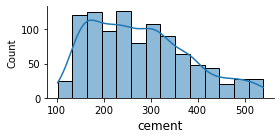

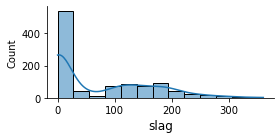

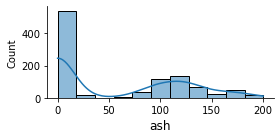

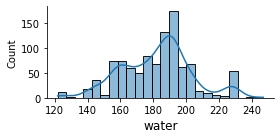

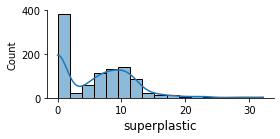

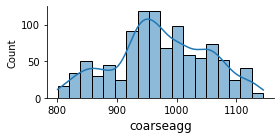

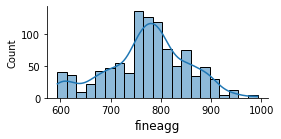

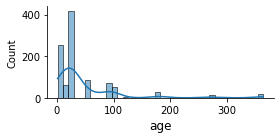

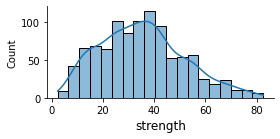

In [22]:
for col in df.columns:
    if df[col].dtypes == int or df[col].dtypes == float:
        sns.displot(df[col], kde=True, height=2, aspect=2)
        plt.xlabel(col, fontsize=12)
        plt.ylabel("Count", fontsize=10)
        plt.show()

##### <i>[Insights]
<i>"slag", "ash", "superplastic", and "age" are right skewed and right tailed.
<br><i>Other variables are relatively close to normal distribution and symmetrical

##### Boxplot

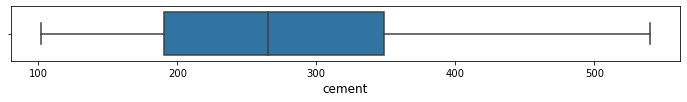

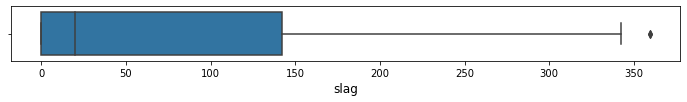

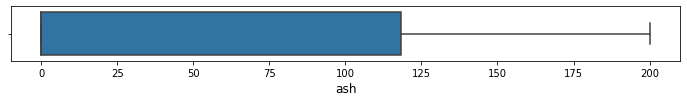

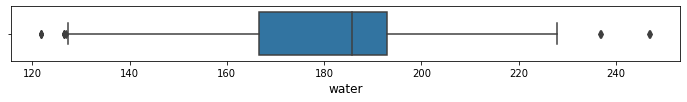

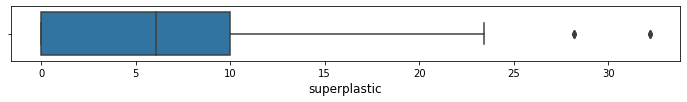

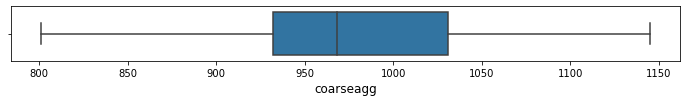

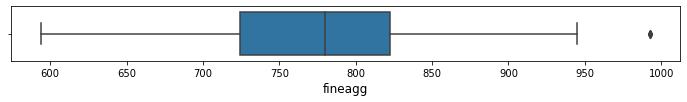

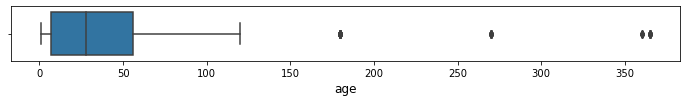

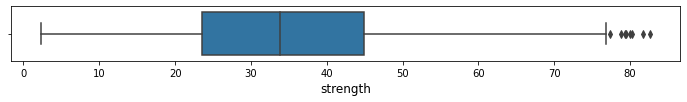

In [23]:
for i in df.columns:
    if df[i].dtypes == int or df[i].dtypes == float:
        plt.figure(figsize=(12,1))
        sns.boxplot(x=i, data=df)
        plt.xlabel(i ,fontsize=12)
        plt.show()
        print()

##### <i>[Insights]
<i>"slag", "superplastic", "fineagg", "age", and "strength" have some outliers in the right side.
<br><i>"water" have outliers in both sides.

##### heatmap (Correlation)

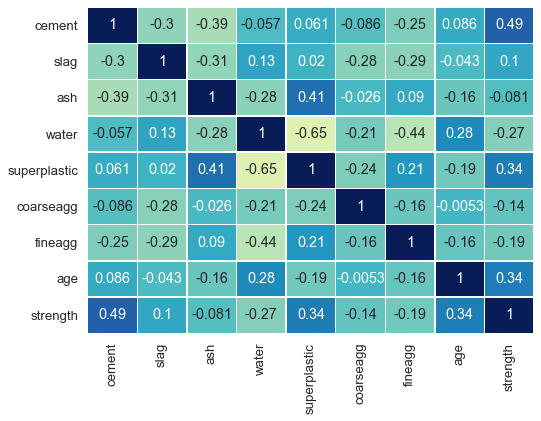

In [24]:
plt.figure(figsize=(8, 6))

# Change Font size
sns.set(font_scale=1.2)

sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

##### <i>[Insights]
<i>Following variables have high correrations (positive / negative 0.5 or higher)
    <br><i> - "water" and "superplastic"<br>
<br><i>Following variables have relatively higher correrations (positive / negative 0.4 or higher)
    <br><i> - "cement" and "strength"
    <br><i> - "ash" and "superplastic"
    <br><i> - "water" and "fineagg"<br>
<br><i>Following variables have relatively moderate correrations (positive / negative 0.3 or higher)
    <br><i> - "superplastic" and "strength"
    <br><i> - "age" and "strength"
    <br><i> - "cement" and "slag"
    <br><i> - "cement" and "ash"
    <br><i> - "slag" and "ash"


##### Pairplot

In [25]:
########### Run only before submitting the work ###########
###sns.pairplot(df)

##### <i>[Notes]
<i>According to Wikipedia, "Superplasticizers (SP's), also known as high range water reducers, are additives used in making high strength concrete. Plasticizers are chemical compounds that enable the production of concrete with approximately 15% less water content. Superplasticizers allow reduction in water content by 30% or more." (https://en.wikipedia.org/wiki/Superplasticizer)
<br><i>This explains the reason of high negative correration between "water" and "superplastic".
<br><i>Since the "Superplasticizers" is the additives which enabels the reduction of the water, we will drop "water" from the variables.

In [26]:
#df.drop('water', axis=1, inplace=True)

##### <i>[Notes]
<i> Tried dropping "water" but since it caused the accuracy score drop in many models, commented out.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1005 non-null   float64
 1   slag          1005 non-null   float64
 2   ash           1005 non-null   float64
 3   water         1005 non-null   float64
 4   superplastic  1005 non-null   float64
 5   coarseagg     1005 non-null   float64
 6   fineagg       1005 non-null   float64
 7   age           1005 non-null   int64  
 8   strength      1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


### Split the dataset into train set test set also the validation 

In [28]:
X = df.drop('strength', axis=1)
y = df['strength']

In [29]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_inter, y_train, y_inter = train_test_split(X, y, test_size=.3, random_state=1)
X_validation, X_test, y_validation, y_test = train_test_split(X_inter, y_inter, test_size=.5, random_state=1)

In [31]:
print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)

(703, 8)
(151, 8)
(151, 8)


### Models

#### Linear Regression

In [32]:
model_name = 'Linear Regression'

In [33]:
#X_train, X_inter, y_train, y_inter = train_test_split(X, y, test_size=.3, random_state=1)
#X_validation, X_test, y_validation, y_test = train_test_split(X_inter, y_inter, test_size=.5, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

In [36]:
y_pred = model.predict(X_test)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred)**0.5

# R2 Squared:
r2s = r2_score(y_test, y_pred)

# Training Score
accuracy_training = model.score(X_train, y_train)

# Testing Score
accuracy_testing = model.score(X_test, y_test)

#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':[model_name],
                          'Training accuracy': [accuracy_training],
                          'Testing accuracy': [accuracy_testing],
                          'Mean Absolute Error': [mae],
                          'Root Mean Squared Error': [rmse],
                          'R2 Squared': [r2s]
                         })
resultsDf = resultsDf[['Method', 'Training accuracy', 'Testing accuracy', 'Mean Absolute Error', 'Root Mean Squared Error', 'R2 Squared']]
resultsDf

,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,Linear Regression,0.6217,0.5420,8.0367,10.3168,0.5420


In [37]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(model.coef_[0]),4)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
0,cement,0.1300
1,slag,0.1300
2,ash,0.1300
3,water,0.1300
4,superplastic,0.1300
5,coarseagg,0.1300
6,fineagg,0.1300
7,age,0.1300


#### Linear Regression (Preprocessing Scale)

In [38]:
model_name = 'Linear Regression (Preprocessing Scale)'

In [39]:
#X_train, X_inter, y_train, y_inter = train_test_split(X, y, test_size=.3, random_state=1)
#X_validation, X_test, y_validation, y_test = train_test_split(X_inter, y_inter, test_size=.5, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [40]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

In [41]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
# Function to calculate and print the score for each models

def print_results(model, X_train, y_train, X_test, y_test, resultsDf):
    y_pred = model.predict(X_test)

    # Mean Absolute Error
    mae = mean_absolute_error(y_test, y_pred)

    # RMSE (Root Mean Squared Error)
    rmse = mean_squared_error(y_test, y_pred)**0.5

    # R2 Squared:
    r2s = r2_score(y_test, y_pred)

    # Training Score
    accuracy_training = model.score(X_train, y_train)

    # Testing Score
    accuracy_testing = model.score(X_test, y_test)

    tempResultsDf = pd.DataFrame({'Method':[model_name],
                                'Training accuracy': [accuracy_training],
                                'Testing accuracy': [accuracy_testing],
                                'Mean Absolute Error': [mae],
                                'Root Mean Squared Error': [rmse],
                                'R2 Squared': [r2s]
                             })
    resultsDf = pd.concat([resultsDf, tempResultsDf])
    resultsDf = resultsDf[['Method', 'Training accuracy', 'Testing accuracy', 'Mean Absolute Error', 'Root Mean Squared Error', 'R2 Squared']].reset_index()
    return resultsDf

In [43]:
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6217,0.5420,8.0367,10.3168,0.5420
1,0,Linear Regression (Preprocessing Scale),0.6217,0.5186,8.0143,10.5766,0.5186


#### Linear Regression (Standard Scaler)

In [44]:
model_name = 'Linear Regression (Standard Scale)'

In [45]:
#X_train, X_inter, y_train, y_inter = train_test_split(X, y, test_size=.3, random_state=1)
#X_validation, X_test, y_validation, y_test = train_test_split(X_inter, y_inter, test_size=.5, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [46]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [47]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6217,0.5420,8.0367,10.3168,0.5420
1,1,Linear Regression (Preprocessing Scale),0.6217,0.5186,8.0143,10.5766,0.5186
2,0,Linear Regression (Standard Scale),0.6217,0.5420,8.0367,10.3168,0.5420


#### Linear Regression (MixMax Scaler)

In [49]:
model_name = 'Linear Regression (MinMax Scale)'

In [50]:
#X_train, X_inter, y_train, y_inter = train_test_split(X, y, test_size=.3, random_state=1)
#X_validation, X_test, y_validation, y_test = train_test_split(X_inter, y_inter, test_size=.5, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [51]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6217,0.5420,8.0367,10.3168,0.5420
1,1,Linear Regression (Preprocessing Scale),0.6217,0.5186,8.0143,10.5766,0.5186
2,2,Linear Regression (Standard Scale),0.6217,0.5420,8.0367,10.3168,0.5420
3,0,Linear Regression (MinMax Scale),0.6217,0.5420,8.0367,10.3168,0.5420


#### Ridge Regression

In [54]:
model_name = 'Ridge Regression'

In [55]:
#X_train, X_inter, y_train, y_inter = train_test_split(X, y, test_size=.3, random_state=1)
#X_validation, X_test, y_validation, y_test = train_test_split(X_inter, y_inter, test_size=.5, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [56]:
from sklearn.linear_model import Ridge

In [57]:
model = Ridge(alpha=.3)
model.fit(X_train, y_train)

Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [58]:
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6217,0.5420,8.0367,10.3168,0.5420
1,1,Linear Regression (Preprocessing Scale),0.6217,0.5186,8.0143,10.5766,0.5186
2,2,Linear Regression (Standard Scale),0.6217,0.5420,8.0367,10.3168,0.5420
3,3,Linear Regression (MinMax Scale),0.6217,0.5420,8.0367,10.3168,0.5420
4,0,Ridge Regression,0.6217,0.5420,8.0367,10.3168,0.5420


#### Ridge Regression (Standard Scaler)

In [59]:
model_name = 'Ridge Regression (Standard Scaler)'

In [60]:
#X_train, X_inter, y_train, y_inter = train_test_split(X, y, test_size=.3, random_state=1)
#X_validation, X_test, y_validation, y_test = train_test_split(X_inter, y_inter, test_size=.5, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [61]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
from sklearn.linear_model import Ridge

In [63]:
model = Ridge(alpha=.3)
model.fit(X_train, y_train)

Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [64]:
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6217,0.5420,8.0367,10.3168,0.5420
1,1,Linear Regression (Preprocessing Scale),0.6217,0.5186,8.0143,10.5766,0.5186
2,2,Linear Regression (Standard Scale),0.6217,0.5420,8.0367,10.3168,0.5420
3,3,Linear Regression (MinMax Scale),0.6217,0.5420,8.0367,10.3168,0.5420
4,4,Ridge Regression,0.6217,0.5420,8.0367,10.3168,0.5420
5,0,Ridge Regression (Standard Scaler),0.6217,0.5423,8.0363,10.3128,0.5423


#### Lasso Regression

In [65]:
model_name = 'Lasso Regression'

In [66]:
from sklearn.linear_model import Lasso

In [67]:
#X_train, X_inter, y_train, y_inter = train_test_split(X, y, test_size=.3, random_state=1)
#X_validation, X_test, y_validation, y_test = train_test_split(X_inter, y_inter, test_size=.5, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [68]:
model = Lasso(alpha=0.2)
model.fit(X_train, y_train)

Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [69]:
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6217,0.5420,8.0367,10.3168,0.5420
1,1,Linear Regression (Preprocessing Scale),0.6217,0.5186,8.0143,10.5766,0.5186
2,2,Linear Regression (Standard Scale),0.6217,0.5420,8.0367,10.3168,0.5420
3,3,Linear Regression (MinMax Scale),0.6217,0.5420,8.0367,10.3168,0.5420
4,4,Ridge Regression,0.6217,0.5420,8.0367,10.3168,0.5420
5,5,Ridge Regression (Standard Scaler),0.6217,0.5423,8.0363,10.3128,0.5423
6,0,Lasso Regression,0.6217,0.5423,8.0343,10.3133,0.5423


#### Lasso Regression (Standard Scaler)

In [70]:
model_name = 'Lasso Regression (Standard Scaler)'

In [71]:
from sklearn.linear_model import Lasso

In [72]:
#X_train, X_inter, y_train, y_inter = train_test_split(X, y, test_size=.3, random_state=1)
#X_validation, X_test, y_validation, y_test = train_test_split(X_inter, y_inter, test_size=.5, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [73]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
model = Lasso(alpha=0.2)
model.fit(X_train, y_train)

Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [75]:
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6217,0.5420,8.0367,10.3168,0.5420
1,1,Linear Regression (Preprocessing Scale),0.6217,0.5186,8.0143,10.5766,0.5186
2,2,Linear Regression (Standard Scale),0.6217,0.5420,8.0367,10.3168,0.5420
3,3,Linear Regression (MinMax Scale),0.6217,0.5420,8.0367,10.3168,0.5420
4,4,Ridge Regression,0.6217,0.5420,8.0367,10.3168,0.5420
5,5,Ridge Regression (Standard Scaler),0.6217,0.5423,8.0363,10.3128,0.5423
6,6,Lasso Regression,0.6217,0.5423,8.0343,10.3133,0.5423
7,0,Lasso Regression (Standard Scaler),0.6163,0.5480,8.0827,10.2482,0.5480


#### Linear Regression & Polynomial models

In [76]:
model_name = 'Linear Regression & Polynomial models'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [77]:
from sklearn.preprocessing import PolynomialFeatures

In [78]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

In [79]:
pipe = make_pipeline(PolynomialFeatures(degree = 2, interaction_only=True), LinearRegression())
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=True, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [80]:
model = pipe

In [81]:
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6217,0.5420,8.0367,10.3168,0.5420
1,1,Linear Regression (Preprocessing Scale),0.6217,0.5186,8.0143,10.5766,0.5186
2,2,Linear Regression (Standard Scale),0.6217,0.5420,8.0367,10.3168,0.5420
3,3,Linear Regression (MinMax Scale),0.6217,0.5420,8.0367,10.3168,0.5420
4,4,Ridge Regression,0.6217,0.5420,8.0367,10.3168,0.5420
5,5,Ridge Regression (Standard Scaler),0.6217,0.5423,8.0363,10.3128,0.5423
6,6,Lasso Regression,0.6217,0.5423,8.0343,10.3133,0.5423
7,7,Lasso Regression (Standard Scaler),0.6163,0.5480,8.0827,10.2482,0.5480
8,0,Linear Regression & Polynomial models,0.7595,0.6897,6.7558,8.4919,0.6897


#### Ridge Regression & Polynomial models

In [82]:
model_name = 'Ridge Regression & Polynomial models'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [83]:
pipe = make_pipeline(PolynomialFeatures(degree = 2, interaction_only=True), Ridge(alpha=.3))
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=True, order='C')),
                ('ridge',
                 Ridge(alpha=0.3, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [84]:
model = pipe

In [85]:
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6217,0.5420,8.0367,10.3168,0.5420
1,1,Linear Regression (Preprocessing Scale),0.6217,0.5186,8.0143,10.5766,0.5186
2,2,Linear Regression (Standard Scale),0.6217,0.5420,8.0367,10.3168,0.5420
3,3,Linear Regression (MinMax Scale),0.6217,0.5420,8.0367,10.3168,0.5420
4,4,Ridge Regression,0.6217,0.5420,8.0367,10.3168,0.5420
5,5,Ridge Regression (Standard Scaler),0.6217,0.5423,8.0363,10.3128,0.5423
6,6,Lasso Regression,0.6217,0.5423,8.0343,10.3133,0.5423
7,7,Lasso Regression (Standard Scaler),0.6163,0.5480,8.0827,10.2482,0.5480
8,8,Linear Regression & Polynomial models,0.7595,0.6897,6.7558,8.4919,0.6897
9,0,Ridge Regression & Polynomial models,0.7595,0.6905,6.7467,8.4809,0.6905


####  Lasso Regression & Polynomial models

In [86]:
model_name = 'Lasso Regression & Polynomial models '

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [87]:
pipe = make_pipeline(PolynomialFeatures(degree = 2, interaction_only=True), Lasso(alpha=0.2))
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=True, order='C')),
                ('lasso',
                 Lasso(alpha=0.2, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [88]:
model = pipe

In [89]:
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6217,0.5420,8.0367,10.3168,0.5420
1,1,Linear Regression (Preprocessing Scale),0.6217,0.5186,8.0143,10.5766,0.5186
2,2,Linear Regression (Standard Scale),0.6217,0.5420,8.0367,10.3168,0.5420
3,3,Linear Regression (MinMax Scale),0.6217,0.5420,8.0367,10.3168,0.5420
4,4,Ridge Regression,0.6217,0.5420,8.0367,10.3168,0.5420
5,5,Ridge Regression (Standard Scaler),0.6217,0.5423,8.0363,10.3128,0.5423
6,6,Lasso Regression,0.6217,0.5423,8.0343,10.3133,0.5423
7,7,Lasso Regression (Standard Scaler),0.6163,0.5480,8.0827,10.2482,0.5480
8,8,Linear Regression & Polynomial models,0.7595,0.6897,6.7558,8.4919,0.6897
9,9,Ridge Regression & Polynomial models,0.7595,0.6905,6.7467,8.4809,0.6905


#### Feature Selection

In [90]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [91]:
#X_train, X_inter, y_train, y_inter = train_test_split(X, y, test_size=.3, random_state=1)
#X_validation, X_test, y_validation, y_test = train_test_split(X_inter, y_inter, test_size=.5, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [92]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
# Build step forward feature selection
sfs1 = sfs(model, k_features=5, forward=True, scoring='r2', cv=5)

In [94]:
# Perform SFFS
sfs1 = sfs1.fit(X_train.values, y_train.values)

In [95]:
sfs1.get_metric_dict()

{1: {'feature_idx': (0,),
  'cv_scores': array([0.29103203, 0.12940783, 0.3272273 , 0.28980092, 0.27793225]),
  'avg_score': 0.26308006636836134,
  'feature_names': ('0',),
  'ci_bound': 0.08848747331696936,
  'std_dev': 0.06884626045090293,
  'std_err': 0.03442313022545146},
 2: {'feature_idx': (0, 4),
  'cv_scores': array([0.3777365 , 0.28925982, 0.43933145, 0.33589711, 0.35014822]),
  'avg_score': 0.3584746190953248,
  'feature_names': ('0', '4'),
  'ci_bound': 0.06369290036938342,
  'std_dev': 0.049555240344545594,
  'std_err': 0.024777620172272797},
 3: {'feature_idx': (0, 4, 7),
  'cv_scores': array([0.485806  , 0.46142898, 0.55496042, 0.47557306, 0.42150006]),
  'avg_score': 0.47985370377481623,
  'feature_names': ('0', '4', '7'),
  'ci_bound': 0.05584552889183568,
  'std_dev': 0.04344971873401236,
  'std_err': 0.02172485936700618},
 4: {'feature_idx': (0, 1, 4, 7),
  'cv_scores': array([0.53242552, 0.4895384 , 0.60931565, 0.57301039, 0.51881972]),
  'avg_score': 0.5446219349157

In [96]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

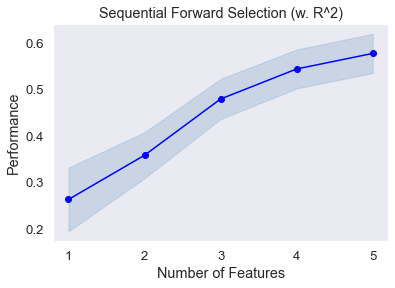

In [97]:
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [98]:
# Which features?
columnList = list(X_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 3, 4, 7]


In [99]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['cement', 'slag', 'water', 'superplastic', 'age']


In [100]:
model = LinearRegression()
model.fit(X_train[subsetColumnList], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
y_train_pred = model.predict(X_train[subsetColumnList])
print('Training accuracy on selected features: %.3f' % model.score(X_train[subsetColumnList], y_train))
accuracy_training = model.score(X_train[subsetColumnList], y_train)

Training accuracy on selected features: 0.591


In [102]:
y_test_pred = model.predict(X_test[subsetColumnList])
print('Testing accuracy on selected features: %.3f' % model.score(X_test[subsetColumnList], y_test))
accuracy_testing = model.score(X_test[subsetColumnList], y_test)

Testing accuracy on selected features: 0.506


In [103]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
y_train_pred = model.predict(X_train)
print('Training accuracy on selected features: %.3f' % model.score(X_train, y_train))

Training accuracy on selected features: 0.622


In [105]:
y_test_pred = model.predict(X_test)
print('Testing accuracy on selected features: %.3f' % model.score(X_test, y_test))

Testing accuracy on selected features: 0.542


In [106]:
model_name = 'LinearRegression & Feature Selection'

In [107]:
y_pred = y_test_pred

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)

# RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred)**0.5
print("Root Mean Squared Error: ", rmse)

# R2 Squared:
r2s = r2_score(y_test, y_pred)
print("R2 Squared: ", r2s)

Mean Absolute Error:  8.036718221159552
Root Mean Squared Error:  10.316849412941325
R2 Squared:  0.5419610271323055


In [108]:
tempResultsDf = pd.DataFrame({'Method':[model_name],
                            'Training accuracy': [accuracy_training],
                            'Testing accuracy': [accuracy_testing],
                            'Mean Absolute Error': [mae],
                            'Root Mean Squared Error': [rmse],
                            'R2 Squared': [r2s]
                         })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Training accuracy', 'Testing accuracy', 'Mean Absolute Error', 'Root Mean Squared Error', 'R2 Squared']].reset_index()
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6217,0.5420,8.0367,10.3168,0.5420
1,1,Linear Regression (Preprocessing Scale),0.6217,0.5186,8.0143,10.5766,0.5186
2,2,Linear Regression (Standard Scale),0.6217,0.5420,8.0367,10.3168,0.5420
3,3,Linear Regression (MinMax Scale),0.6217,0.5420,8.0367,10.3168,0.5420
4,4,Ridge Regression,0.6217,0.5420,8.0367,10.3168,0.5420
5,5,Ridge Regression (Standard Scaler),0.6217,0.5423,8.0363,10.3128,0.5423
6,6,Lasso Regression,0.6217,0.5423,8.0343,10.3133,0.5423
7,7,Lasso Regression (Standard Scaler),0.6163,0.5480,8.0827,10.2482,0.5480
8,8,Linear Regression & Polynomial models,0.7595,0.6897,6.7558,8.4919,0.6897
9,9,Ridge Regression & Polynomial models,0.7595,0.6905,6.7467,8.4809,0.6905


##### <i>[Insights]
<i>In this case, feature selection did not improve any accuracy.

#### Decision Tree (Regression)

In [109]:
model_name = 'Decision Tree (Regression)'

In [110]:
from sklearn.tree import DecisionTreeRegressor

In [111]:
#X_train, X_inter, y_train, y_inter = train_test_split(X, y, test_size=.3, random_state=1)
#X_validation, X_test, y_validation, y_test = train_test_split(X_inter, y_inter, test_size=.5, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [112]:
model = DecisionTreeRegressor(max_depth=6)
model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [113]:
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6217,0.5420,8.0367,10.3168,0.5420
1,1,Linear Regression (Preprocessing Scale),0.6217,0.5186,8.0143,10.5766,0.5186
2,2,Linear Regression (Standard Scale),0.6217,0.5420,8.0367,10.3168,0.5420
3,3,Linear Regression (MinMax Scale),0.6217,0.5420,8.0367,10.3168,0.5420
4,4,Ridge Regression,0.6217,0.5420,8.0367,10.3168,0.5420
5,5,Ridge Regression (Standard Scaler),0.6217,0.5423,8.0363,10.3128,0.5423
6,6,Lasso Regression,0.6217,0.5423,8.0343,10.3133,0.5423
7,7,Lasso Regression (Standard Scaler),0.6163,0.5480,8.0827,10.2482,0.5480
8,8,Linear Regression & Polynomial models,0.7595,0.6897,6.7558,8.4919,0.6897
9,9,Ridge Regression & Polynomial models,0.7595,0.6905,6.7467,8.4809,0.6905


#### Linear SVR

In [114]:
model_name = 'Linear SVR'

In [115]:
from sklearn.svm import LinearSVR

In [116]:
#X_train, X_inter, y_train, y_inter = train_test_split(X, y, test_size=.3, random_state=1)
#X_validation, X_test, y_validation, y_test = train_test_split(X_inter, y_inter, test_size=.5, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [117]:
model = LinearSVR(epsilon=13, random_state=1)
model.fit(X_train, y_train)

LinearSVR(C=1.0, dual=True, epsilon=13, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=1, tol=0.0001, verbose=0)

In [118]:
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6217,0.5420,8.0367,10.3168,0.5420
1,1,Linear Regression (Preprocessing Scale),0.6217,0.5186,8.0143,10.5766,0.5186
2,2,Linear Regression (Standard Scale),0.6217,0.5420,8.0367,10.3168,0.5420
3,3,Linear Regression (MinMax Scale),0.6217,0.5420,8.0367,10.3168,0.5420
4,4,Ridge Regression,0.6217,0.5420,8.0367,10.3168,0.5420
5,5,Ridge Regression (Standard Scaler),0.6217,0.5423,8.0363,10.3128,0.5423
6,6,Lasso Regression,0.6217,0.5423,8.0343,10.3133,0.5423
7,7,Lasso Regression (Standard Scaler),0.6163,0.5480,8.0827,10.2482,0.5480
8,8,Linear Regression & Polynomial models,0.7595,0.6897,6.7558,8.4919,0.6897
9,9,Ridge Regression & Polynomial models,0.7595,0.6905,6.7467,8.4809,0.6905


#### Linear SVR & MinMax Scaler

In [119]:
model_name = 'Linear SVR & MinMax S.'

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [121]:
pipe = make_pipeline(MinMaxScaler(), LinearSVR(C=100))
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('linearsvr',
                 LinearSVR(C=100, dual=True, epsilon=0.0, fit_intercept=True,
                           intercept_scaling=1.0, loss='epsilon_insensitive',
                           max_iter=1000, random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [122]:
model = pipe

In [123]:
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6217,0.5420,8.0367,10.3168,0.5420
1,1,Linear Regression (Preprocessing Scale),0.6217,0.5186,8.0143,10.5766,0.5186
2,2,Linear Regression (Standard Scale),0.6217,0.5420,8.0367,10.3168,0.5420
3,3,Linear Regression (MinMax Scale),0.6217,0.5420,8.0367,10.3168,0.5420
4,4,Ridge Regression,0.6217,0.5420,8.0367,10.3168,0.5420
5,5,Ridge Regression (Standard Scaler),0.6217,0.5423,8.0363,10.3128,0.5423
6,6,Lasso Regression,0.6217,0.5423,8.0343,10.3133,0.5423
7,7,Lasso Regression (Standard Scaler),0.6163,0.5480,8.0827,10.2482,0.5480
8,8,Linear Regression & Polynomial models,0.7595,0.6897,6.7558,8.4919,0.6897
9,9,Ridge Regression & Polynomial models,0.7595,0.6905,6.7467,8.4809,0.6905


#### Linear SVR & Standard Scaler

In [124]:
model_name = 'Linear SVR & Standard S.'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [125]:
pipe = make_pipeline(StandardScaler(), LinearSVR(C=100))
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearsvr',
                 LinearSVR(C=100, dual=True, epsilon=0.0, fit_intercept=True,
                           intercept_scaling=1.0, loss='epsilon_insensitive',
                           max_iter=1000, random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [126]:
model = pipe

In [127]:
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6217,0.5420,8.0367,10.3168,0.5420
1,1,Linear Regression (Preprocessing Scale),0.6217,0.5186,8.0143,10.5766,0.5186
2,2,Linear Regression (Standard Scale),0.6217,0.5420,8.0367,10.3168,0.5420
3,3,Linear Regression (MinMax Scale),0.6217,0.5420,8.0367,10.3168,0.5420
4,4,Ridge Regression,0.6217,0.5420,8.0367,10.3168,0.5420
5,5,Ridge Regression (Standard Scaler),0.6217,0.5423,8.0363,10.3128,0.5423
6,6,Lasso Regression,0.6217,0.5423,8.0343,10.3133,0.5423
7,7,Lasso Regression (Standard Scaler),0.6163,0.5480,8.0827,10.2482,0.5480
8,8,Linear Regression & Polynomial models,0.7595,0.6897,6.7558,8.4919,0.6897
9,9,Ridge Regression & Polynomial models,0.7595,0.6905,6.7467,8.4809,0.6905


#### Decision Tree Regressor & Standard Scaler

In [128]:
model_name = 'DT Reg. & Standard S.'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [129]:
pipe = make_pipeline(StandardScaler(), DecisionTreeRegressor(max_depth=6))
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                       max_depth=6, max_features=None,
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort='deprecated', random_state=None,
                                       splitter='best'))],
         verbose=False)

In [130]:
model = pipe

In [131]:
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6217,0.5420,8.0367,10.3168,0.5420
1,1,Linear Regression (Preprocessing Scale),0.6217,0.5186,8.0143,10.5766,0.5186
2,2,Linear Regression (Standard Scale),0.6217,0.5420,8.0367,10.3168,0.5420
3,3,Linear Regression (MinMax Scale),0.6217,0.5420,8.0367,10.3168,0.5420
4,4,Ridge Regression,0.6217,0.5420,8.0367,10.3168,0.5420
5,5,Ridge Regression (Standard Scaler),0.6217,0.5423,8.0363,10.3128,0.5423
6,6,Lasso Regression,0.6217,0.5423,8.0343,10.3133,0.5423
7,7,Lasso Regression (Standard Scaler),0.6163,0.5480,8.0827,10.2482,0.5480
8,8,Linear Regression & Polynomial models,0.7595,0.6897,6.7558,8.4919,0.6897
9,9,Ridge Regression & Polynomial models,0.7595,0.6905,6.7467,8.4809,0.6905


#### Bagging Regressor & Standard Scaler

In [132]:
model_name = 'Bagging Reg. & StandardS.'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [133]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor

In [134]:
pipe = make_pipeline(StandardScaler(), BaggingRegressor(base_estimator=SVR(), n_estimators=10, random_state=1))
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('baggingregressor',
                 BaggingRegressor(base_estimator=SVR(C=1.0, cache_size=200,
                                                     coef0=0.0, degree=3,
                                                     epsilon=0.1, gamma='scale',
                                                     kernel='rbf', max_iter=-1,
                                                     shrinking=True, tol=0.001,
                                                     verbose=False),
                                  bootstrap=True, bootstrap_features=False,
                                  max_features=1.0, max_samples=1.0,
                                  n_estimators=10, n_jobs=None, oob_score=False,
                                  random_state=1, verbose=0,
                                  warm_start=False))],
         verbose=False)

In [135]:
model = pipe

In [136]:
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6217,0.5420,8.0367,10.3168,0.5420
1,1,Linear Regression (Preprocessing Scale),0.6217,0.5186,8.0143,10.5766,0.5186
2,2,Linear Regression (Standard Scale),0.6217,0.5420,8.0367,10.3168,0.5420
3,3,Linear Regression (MinMax Scale),0.6217,0.5420,8.0367,10.3168,0.5420
4,4,Ridge Regression,0.6217,0.5420,8.0367,10.3168,0.5420
5,5,Ridge Regression (Standard Scaler),0.6217,0.5423,8.0363,10.3128,0.5423
6,6,Lasso Regression,0.6217,0.5423,8.0343,10.3133,0.5423
7,7,Lasso Regression (Standard Scaler),0.6163,0.5480,8.0827,10.2482,0.5480
8,8,Linear Regression & Polynomial models,0.7595,0.6897,6.7558,8.4919,0.6897
9,9,Ridge Regression & Polynomial models,0.7595,0.6905,6.7467,8.4809,0.6905


#### Gradient Boosting Regressor & MinMax Scaler

In [137]:
model_name = 'Grad. Boost. Reg. & MinMax.S.'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [138]:
from sklearn.ensemble import GradientBoostingRegressor

In [139]:
pipe = make_pipeline(MinMaxScaler(), GradientBoostingRegressor(loss='ls', n_estimators=10, random_state=1))
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                           criterion='friedman_mse', init=None,
                                           learning_rate=0.1, loss='ls',
                                           max_depth=3, max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=10,
                                           n_iter_no_change=None,
                          

In [140]:
model = pipe

In [141]:
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6217,0.5420,8.0367,10.3168,0.5420
1,1,Linear Regression (Preprocessing Scale),0.6217,0.5186,8.0143,10.5766,0.5186
2,2,Linear Regression (Standard Scale),0.6217,0.5420,8.0367,10.3168,0.5420
3,3,Linear Regression (MinMax Scale),0.6217,0.5420,8.0367,10.3168,0.5420
4,4,Ridge Regression,0.6217,0.5420,8.0367,10.3168,0.5420
5,5,Ridge Regression (Standard Scaler),0.6217,0.5423,8.0363,10.3128,0.5423
6,6,Lasso Regression,0.6217,0.5423,8.0343,10.3133,0.5423
7,7,Lasso Regression (Standard Scaler),0.6163,0.5480,8.0827,10.2482,0.5480
8,8,Linear Regression & Polynomial models,0.7595,0.6897,6.7558,8.4919,0.6897
9,9,Ridge Regression & Polynomial models,0.7595,0.6905,6.7467,8.4809,0.6905


#### Gradient Boosting Regressor & Standard Scaler

In [142]:
model_name = 'Grad. Boost. Reg. & Std.S.'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [143]:
pipe = make_pipeline(StandardScaler(), GradientBoostingRegressor(loss='ls', n_estimators=10, random_state=1))
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                           criterion='friedman_mse', init=None,
                                           learning_rate=0.1, loss='ls',
                                           max_depth=3, max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=10,
                                           n_iter_no_change=No

In [144]:
model = pipe

In [145]:
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6217,0.5420,8.0367,10.3168,0.5420
1,1,Linear Regression (Preprocessing Scale),0.6217,0.5186,8.0143,10.5766,0.5186
2,2,Linear Regression (Standard Scale),0.6217,0.5420,8.0367,10.3168,0.5420
3,3,Linear Regression (MinMax Scale),0.6217,0.5420,8.0367,10.3168,0.5420
4,4,Ridge Regression,0.6217,0.5420,8.0367,10.3168,0.5420
5,5,Ridge Regression (Standard Scaler),0.6217,0.5423,8.0363,10.3128,0.5423
6,6,Lasso Regression,0.6217,0.5423,8.0343,10.3133,0.5423
7,7,Lasso Regression (Standard Scaler),0.6163,0.5480,8.0827,10.2482,0.5480
8,8,Linear Regression & Polynomial models,0.7595,0.6897,6.7558,8.4919,0.6897
9,9,Ridge Regression & Polynomial models,0.7595,0.6905,6.7467,8.4809,0.6905


#### Gradient Boosting Regressor & Standard Scaler & PCA

In [146]:
model_name = 'Grad. Boost. Reg. & Std.S. & PCA'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [147]:
from sklearn.decomposition import PCA 

In [148]:
pipe = make_pipeline(StandardScaler(), PCA(n_components=2), GradientBoostingRegressor(loss='ls', n_estimators=10, random_state=1))
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=2,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                           criterion='friedman_mse', init=None,
                                           learning_rate=0.1, loss='ls',
                                           max_depth=3, max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_spli

In [149]:
model = pipe

In [150]:
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6217,0.5420,8.0367,10.3168,0.5420
1,1,Linear Regression (Preprocessing Scale),0.6217,0.5186,8.0143,10.5766,0.5186
2,2,Linear Regression (Standard Scale),0.6217,0.5420,8.0367,10.3168,0.5420
3,3,Linear Regression (MinMax Scale),0.6217,0.5420,8.0367,10.3168,0.5420
4,4,Ridge Regression,0.6217,0.5420,8.0367,10.3168,0.5420
5,5,Ridge Regression (Standard Scaler),0.6217,0.5423,8.0363,10.3128,0.5423
6,6,Lasso Regression,0.6217,0.5423,8.0343,10.3133,0.5423
7,7,Lasso Regression (Standard Scaler),0.6163,0.5480,8.0827,10.2482,0.5480
8,8,Linear Regression & Polynomial models,0.7595,0.6897,6.7558,8.4919,0.6897
9,9,Ridge Regression & Polynomial models,0.7595,0.6905,6.7467,8.4809,0.6905


##### <i>[Insights]
<i>Because our objective is get the model with 85% to 95% accuracy, we will use "Testing accuracy" to compare each models.
    <br><i> Since "Lasso Regression & Polynomial models", "Decision Tree (Regression) & Standard Slacer", and "Gradient Boosint & Standard Scaler" have relatively good score, we will perform Hyperparameter Tuning on these.

### Hyperparameter Tuning

#### Lasso Regression & Polynomial Features & Randomized Search CV

In [151]:
from sklearn.model_selection import RandomizedSearchCV

In [152]:
model_name = 'Lasso Reg. & Rand S.'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [153]:
pipe = make_pipeline(PolynomialFeatures(degree = 2, interaction_only=True), Lasso(alpha=0.2, random_state=1))
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=True, order='C')),
                ('lasso',
                 Lasso(alpha=0.2, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=1, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [154]:
grid_values = {'polynomialfeatures__degree' : np.arange(1,5),
               'lasso__alpha' : np.arange(0.1, 0.5, 0.1),
               'lasso__max_iter' : np.arange(900,1200, 50)
              }

In [155]:
grid = RandomizedSearchCV(pipe, grid_values, cv=10, random_state=1, n_jobs=-1)
grid.fit(X_train, y_train)

best_cross_validation_accuracy = grid.best_score_
print("Best Cross Validation Accuracy: ", best_cross_validation_accuracy)

best_parameter = grid.best_params_
print("Best Parameter: ", best_parameter)

pipe = grid

Best Cross Validation Accuracy:  0.7155082448290473
Best Parameter:  {'polynomialfeatures__degree': 2, 'lasso__max_iter': 1100, 'lasso__alpha': 0.30000000000000004}


In [156]:
model = pipe

In [157]:
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6217,0.5420,8.0367,10.3168,0.5420
1,1,Linear Regression (Preprocessing Scale),0.6217,0.5186,8.0143,10.5766,0.5186
2,2,Linear Regression (Standard Scale),0.6217,0.5420,8.0367,10.3168,0.5420
3,3,Linear Regression (MinMax Scale),0.6217,0.5420,8.0367,10.3168,0.5420
4,4,Ridge Regression,0.6217,0.5420,8.0367,10.3168,0.5420
5,5,Ridge Regression (Standard Scaler),0.6217,0.5423,8.0363,10.3128,0.5423
6,6,Lasso Regression,0.6217,0.5423,8.0343,10.3133,0.5423
7,7,Lasso Regression (Standard Scaler),0.6163,0.5480,8.0827,10.2482,0.5480
8,8,Linear Regression & Polynomial models,0.7595,0.6897,6.7558,8.4919,0.6897
9,9,Ridge Regression & Polynomial models,0.7595,0.6905,6.7467,8.4809,0.6905


#### Decision Tree Regression & Standard Scaler & Randomized Search CV

In [158]:
model_name = 'DT Reg. & Standard S. & Rand S.'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [159]:
pipe = make_pipeline(StandardScaler(), DecisionTreeRegressor(max_depth=6))
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                       max_depth=6, max_features=None,
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort='deprecated', random_state=None,
                                       splitter='best'))],
         verbose=False)

In [160]:
grid_values = {'decisiontreeregressor__criterion' : ['mse', 'friedman_mse', 'mae'],
               'decisiontreeregressor__splitter' : ['best', 'random'],
               'decisiontreeregressor__max_depth' : np.arange(5,15),
               'decisiontreeregressor__min_samples_leaf' : np.arange(1,15)
              }

In [161]:
grid = RandomizedSearchCV(pipe, grid_values, cv=10, random_state=1, n_jobs=-1)
grid.fit(X_train, y_train)

best_cross_validation_accuracy = grid.best_score_
print("Best Cross Validation Accuracy: ", best_cross_validation_accuracy)

best_parameter = grid.best_params_
print("Best Parameter: ", best_parameter)

pipe = grid

Best Cross Validation Accuracy:  0.8086053870530957
Best Parameter:  {'decisiontreeregressor__splitter': 'best', 'decisiontreeregressor__min_samples_leaf': 3, 'decisiontreeregressor__max_depth': 12, 'decisiontreeregressor__criterion': 'friedman_mse'}


In [162]:
model = pipe

In [163]:
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6217,0.5420,8.0367,10.3168,0.5420
1,1,Linear Regression (Preprocessing Scale),0.6217,0.5186,8.0143,10.5766,0.5186
2,2,Linear Regression (Standard Scale),0.6217,0.5420,8.0367,10.3168,0.5420
3,3,Linear Regression (MinMax Scale),0.6217,0.5420,8.0367,10.3168,0.5420
4,4,Ridge Regression,0.6217,0.5420,8.0367,10.3168,0.5420
5,5,Ridge Regression (Standard Scaler),0.6217,0.5423,8.0363,10.3128,0.5423
6,6,Lasso Regression,0.6217,0.5423,8.0343,10.3133,0.5423
7,7,Lasso Regression (Standard Scaler),0.6163,0.5480,8.0827,10.2482,0.5480
8,8,Linear Regression & Polynomial models,0.7595,0.6897,6.7558,8.4919,0.6897
9,9,Ridge Regression & Polynomial models,0.7595,0.6905,6.7467,8.4809,0.6905


#### Gradient Boosting Regressor & Standard Scaler & Randomized Search CV

In [164]:
from sklearn.model_selection import RandomizedSearchCV

In [165]:
model_name = 'Grad. Boost. Reg. & Std.S. & Rand S.'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [166]:
pipe = make_pipeline(StandardScaler(), GradientBoostingRegressor(loss='ls', n_estimators=10, random_state=1))
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                           criterion='friedman_mse', init=None,
                                           learning_rate=0.1, loss='ls',
                                           max_depth=3, max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=10,
                                           n_iter_no_change=No

In [167]:
grid_values = {
                'gradientboostingregressor__n_estimators' : np.arange(1650,1710, 5),
                'gradientboostingregressor__loss' : ['ls', 'lad', 'huber', 'quantile'],
                'gradientboostingregressor__learning_rate' : np.arange(0.17,0.22,0.01),
                'gradientboostingregressor__max_depth' : np.arange(1, 5, 1),
                'gradientboostingregressor__criterion' : ['friedman_mse', 'mse', 'mae']
              }

In [168]:
grid = RandomizedSearchCV(pipe, grid_values, cv=10, random_state=1, n_jobs=-1)
grid.fit(X_train, y_train)

best_cross_validation_accuracy = grid.best_score_
print("Best Cross Validation Accuracy: ", best_cross_validation_accuracy)

best_parameter = grid.best_params_
print("Best Parameter: ", best_parameter)

pipe = grid

Best Cross Validation Accuracy:  0.9204041154719903
Best Parameter:  {'gradientboostingregressor__n_estimators': 1685, 'gradientboostingregressor__max_depth': 4, 'gradientboostingregressor__loss': 'ls', 'gradientboostingregressor__learning_rate': 0.18000000000000002, 'gradientboostingregressor__criterion': 'friedman_mse'}


In [169]:
model = pipe

In [170]:
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6217,0.5420,8.0367,10.3168,0.5420
1,1,Linear Regression (Preprocessing Scale),0.6217,0.5186,8.0143,10.5766,0.5186
2,2,Linear Regression (Standard Scale),0.6217,0.5420,8.0367,10.3168,0.5420
3,3,Linear Regression (MinMax Scale),0.6217,0.5420,8.0367,10.3168,0.5420
4,4,Ridge Regression,0.6217,0.5420,8.0367,10.3168,0.5420
5,5,Ridge Regression (Standard Scaler),0.6217,0.5423,8.0363,10.3128,0.5423
6,6,Lasso Regression,0.6217,0.5423,8.0343,10.3133,0.5423
7,7,Lasso Regression (Standard Scaler),0.6163,0.5480,8.0827,10.2482,0.5480
8,8,Linear Regression & Polynomial models,0.7595,0.6897,6.7558,8.4919,0.6897
9,9,Ridge Regression & Polynomial models,0.7595,0.6905,6.7467,8.4809,0.6905


#### Time

In [171]:
endTime = datetime.now()

In [172]:
total_time = endTime - startTime

In [173]:
print("Start: ", startTime)
print("End  : ", endTime)
print("Time : ", total_time)

Start:  2020-12-05 03:42:18.298345
End  :  2020-12-05 03:44:23.296124
Time :  0:02:04.997779


### <i>[Conclusion]
<i>Comparing three results from the Hyperparameter Tuning ("Lasso Regression & Polynomial models", "Decision Tree (Regression) & Standard Slacer", and "Gradient Boosint & Standard Scaler"), we noted that "Gradient Boosint & Standard Scaler" achieved highest Testing accuracy.
    <i><br> Kfold Cross Validation with CV=10 was used to calculate training accuracy when evaluating three results from Hyperparameter Tuning in addition to the testing accuracy.
    <i><br> Originally, we used both GridSearchCV and RandomSearchCV but because those RandomSearchCV has similar or relatively better performance then GridSearchCV and faster speed, we decided to use only RandomSearchCV.
    <i><br> The model "Gradient Boosint & Standard Scaler" with RandomSearchCV achieved 0.9959 in the Training accuracy and 0.9315 in the Testing accuracy.

### Github

https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-aug20-KokiTabayashi.git